In [2]:
import numpy as np
import matplotlib.pyplot as plt

nnbn
nnn|


# The One Goal For Today

To understand how k means clustering works.


# Clustering

Clustering algorithms separate a data set into groups, or clusters, that are near each other (similar to each other) using a distance metric we choose or define.

When we fit a regression model, we know the dependent variable - the label, the answer. When we cluster, we don't. Clustering is therefore an *unsupervised* method, although we as data scientists can make all kinds of decisions to influence it.


# K-means clustering

K-means clustering is one clustering algorithm. It divides the data into $k$ clusters. Each cluster has a *centroid*, or central point (or "mean"). 

## What we want to optimize

The points in the dataset are assigned to their closest centroid. In other words, we want to minimize the distances between data points and the centroids they are assigned to, across the whole data set. We want to minimize the *inertia*:
$1/N \sum_{j=1}^N d(\vec{x_j}, \vec{m_{\vec{x_j}}})^2$, where $\vec{m_{x_j}}$ is the centroid of the cluster that $x_j$ is currently assigned to, and $d$ is your chosen distance metric.

__What does this look like?__

## The algorithm

To make this computationally efficient, we calculate an approximate solution by iteration:
1. Pick initial centroids.
2. For step in range(max_steps):
  1. Assign each point to its closest centroid.
  2. Pick new centroids using the members in each cluster. If the centroids don't change, then return.

__Is this guaranteed to converge?__

## The 'hyperparameters'

Things a data scientist can do to influence the k-means clustering (by __looking at the data__):
* choose distance metric
* choose $k$
* choose starting points, or subset of data from which starting points should come

In [3]:
# Let's define a distance metric; which one is this??
def distanceo(a, b):
    subtracted = a-b #subtrcat numpy arrays via broadcasting , take difference fo the two arrays 
    return np.sqrt(np.dot(subtracted.T, subtracted)) #square root of squared. #return the sqrt of the sum of each of teh eelements squared-euclidena distance #the @ in here already givces the sum

In [4]:
def distance(a, b):
    return (np.sum(np.abs(a-b)))


In [5]:
# Let's define a function to calculate the distance from each data point to each centroid
def get_distances(item, centroids):    #given a data poiint and a list of centroids 
    distances = [distance(item, centroid) for centroid in centroids] #calcualte the distance between each item and every centroid 
    return distances #list of floating point numbers with 0th number is distance form item to first centroid 1dt index is distance from item to 2nd centroid 

# Let's define a function to update cluster assignments given a set of centroids
def update_clusters(data, centroids): #list of data points, list of centroids 
    clusters = {} #map a centroid index to a list of data pooints 
    mappings = {}
    for i, x in enumerate(centroids): #for evert centroid 
        clusters[i] = []  #key is index of every centroid, at every centroid index is a empty list 
    for j, datum in enumerate(data):  #for every data point 
        distances = get_distances(datum, centroids) #retrurn list of distances 
        min_cluster_index = np.argmin(distances) #get lowest distance 
        clusters[min_cluster_index].append(datum)  #add data point as a value in this clusert index which is the lowest distance   clusters.  {keys are distances, value is data point}
        mappings[j] = min_cluster_index #mappings is just index as keys and values as distances 
    return clusters, mappings


In [6]:
# Let's define a function to update the centroids; data is a list of data points; clusters is a dictionary of centroid->datapoints mappings
def update_centroids(clusters):
    centroids = [] #set centroids to be npthing 
    for data_in_cluster in clusters.values(): #for each set of cluster values around a single centroid 
        centroids.append(np.mean(data_in_cluster, axis=0)) #new centroids is mena fo that cluster
    return centroids #update centrooids to be avaerge of its data points 

In [7]:
# Let's define a function to measure the inertia
def inertia(data, centroids, clusters):
    sum = 0
    for i in clusters.keys():
        #get teh centroid 
        centroid = centroids[i]
        for datum in clusters[i]: #get data points in this centroid 
            sum += distance(datum, centroid)**2 #get distacne and punish ones further away 
    return sum / len(data) #average of the data 

## Let's try it on some toy data!

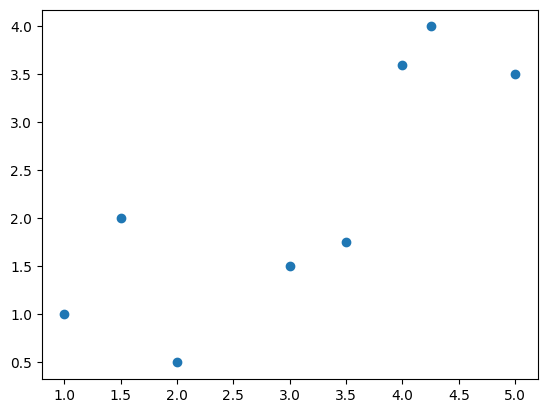

In [8]:
# Let's get some toy data

data = np.array([[1, 1], [2, 0.5], [1.5, 2], [3, 1.5], [3.5, 1.75], [4, 3.6], [4.25, 4], [5, 3.5]])

# Let's look at the data
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [9]:
def plot_clusters(data, mappings, centroids):
    plt.scatter(data[:, 0], data[:, 1], c=list(mappings.values()))
    print(centroids)
    for i, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], marker=i)
    plt.show()

initial centroids
[array([2. , 0.5]), array([5. , 3.5])]
{0: [array([1., 1.]), array([2. , 0.5]), array([1.5, 2. ]), array([3. , 1.5]), array([3.5 , 1.75])], 1: [array([4. , 3.6]), array([4.25, 4.  ]), array([5. , 3.5])]}
[array([2. , 0.5]), array([5. , 3.5])]


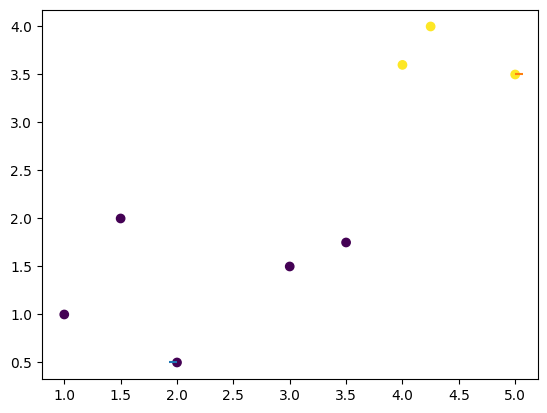

In [10]:
# Let's pick k = 2
k = 2

# Let's pick k points to be centroids, at random
centroidids = np.random.choice(np.arange(len(data)), size=k, replace=False)
centroids = [data[x] for x in centroidids]
print("initial centroids")
print(centroids)

# Initially, only the centroids are in any cluster
clusters, mappings = update_clusters(data, centroids)
print(clusters)
plot_clusters(data, mappings, centroids)

[array([2.2 , 1.35]), array([4.41666667, 3.7       ])]
{0: [array([1., 1.]), array([2. , 0.5]), array([1.5, 2. ]), array([3. , 1.5]), array([3.5 , 1.75])], 1: [array([4. , 3.6]), array([4.25, 4.  ]), array([5. , 3.5])]}
1.2772916666666667
[array([2.2 , 1.35]), array([4.41666667, 3.7       ])]


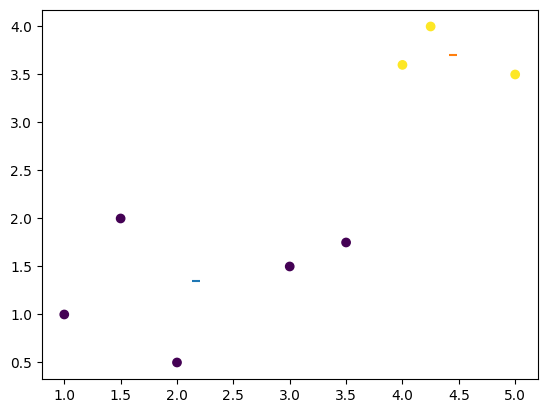

[array([2.2 , 1.35]), array([4.41666667, 3.7       ])]
{0: [array([1., 1.]), array([2. , 0.5]), array([1.5, 2. ]), array([3. , 1.5]), array([3.5 , 1.75])], 1: [array([4. , 3.6]), array([4.25, 4.  ]), array([5. , 3.5])]}
1.2772916666666667
[array([2.2 , 1.35]), array([4.41666667, 3.7       ])]


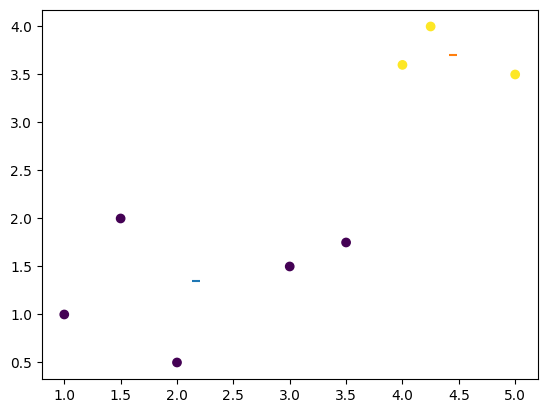

In [11]:
# Let's loop over updating the centroids and plotting
while input() != 'stop':
    centroids = update_centroids(clusters)
    print(centroids)
    clusters, mappings = update_clusters(data, centroids)
    print(clusters)
    print(inertia(data, centroids, clusters))
    plot_clusters(data, mappings, centroids)

## Choosing k

K nearest neighbors can be frustrating, especially with high dimensional data, because you have to choose a value for k. How can you do it, if you can't visualize all the data?

You can inspect an elbow plot of inertia against k, starting with a small k and increasing.

Even if you use this method, it's still important to __look at your data__.

the bigger the k, the more rounds

## Resources
* For a list of lots of clustering algorithms, see https://scikit-learn.org/stable/modules/clustering.html